In [19]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv")

In [20]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [21]:
df=df.drop(df.iloc[:,:1],axis=1)

In [22]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [23]:
num_col=df.columns[df.dtypes!='object']
cat_col=df.columns[df.dtypes=='object']


In [24]:
df[num_col].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [25]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [26]:
colour_map={"G":7,"E":6,"H":5,"F":4,"D":4,"I":3,"J":2}
df["color"]=df["color"].map(colour_map)

In [27]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [28]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
df['clarity'] = df['clarity'].map(clarity_map)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,4,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,2,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,7,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,7,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,7,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,4,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,7,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,4,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,4,3,62.9,55.0,4.45,4.49,2.81,681


In [29]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [30]:
cut_map={"Ideal":1,"Fair":2,"Good":3,"Very Good":4,"Premium":5}
df["cut"]=df["cut"].map(cut_map)

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,4,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,2,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,7,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,7,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,7,4,62.6,59.0,7.65,7.61,4.77,14453


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 14.8 MB


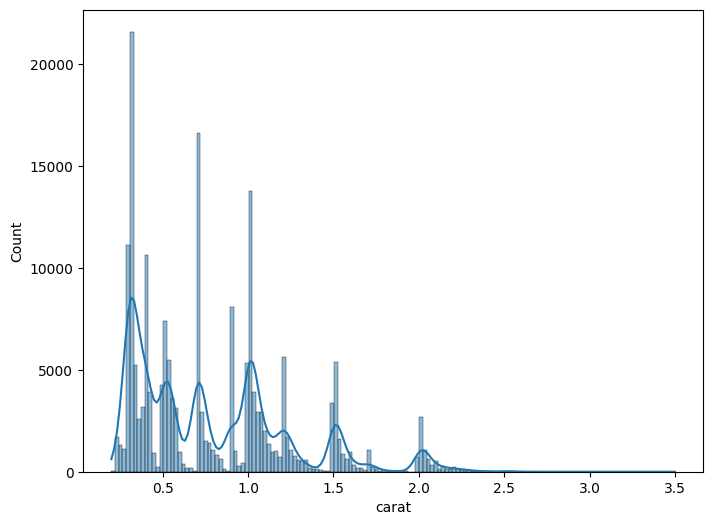

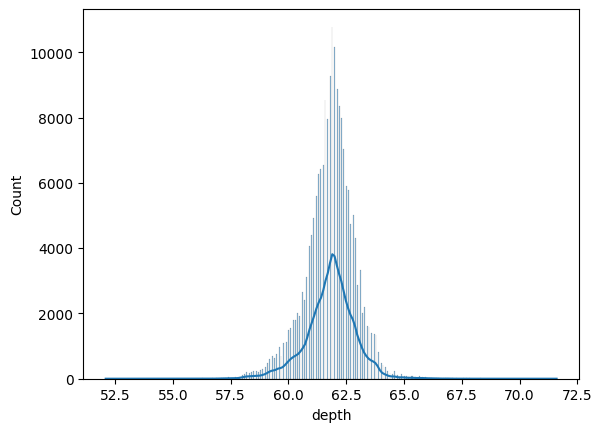

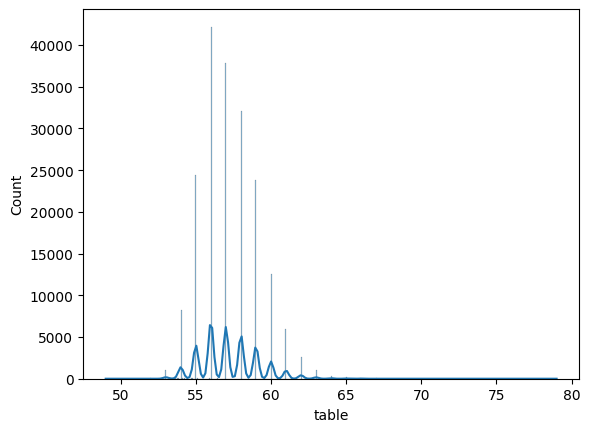

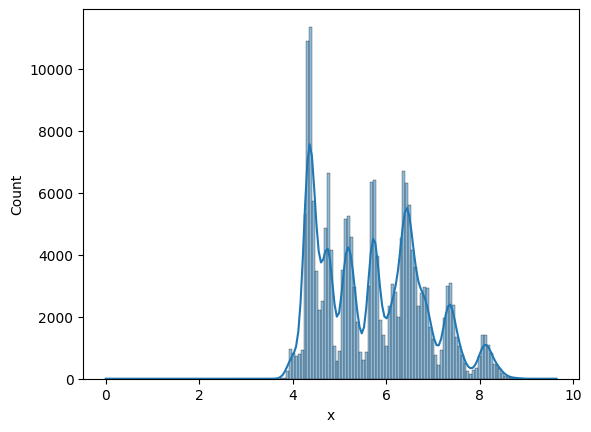

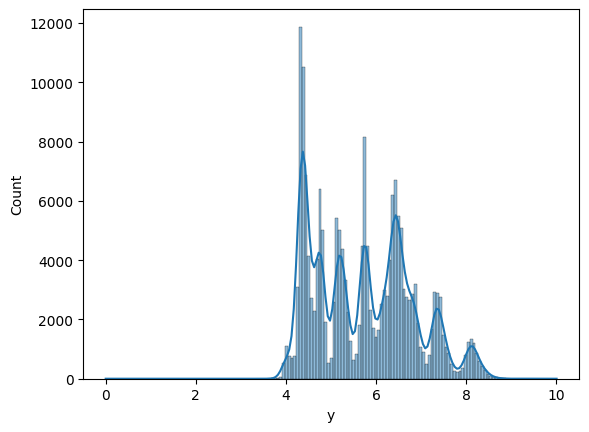

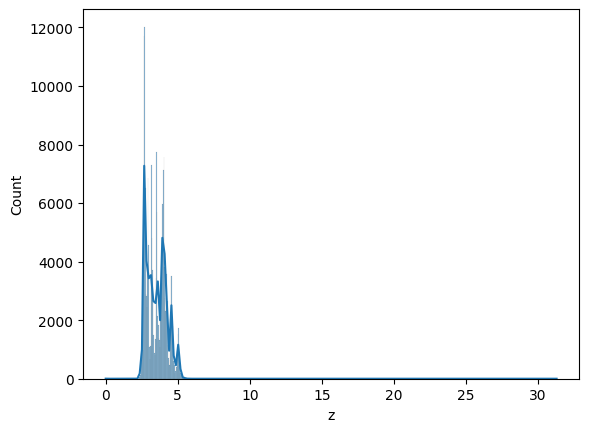

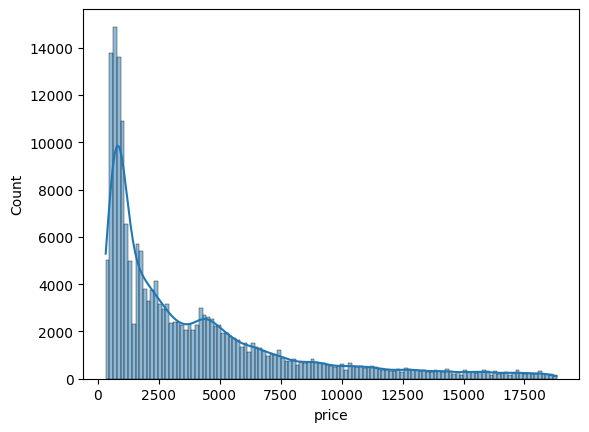

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in num_col:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [16]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.187282,-0.136098,-0.348611,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
cut,0.187282,1.000000,-0.038458,-0.185518,-0.065707,0.617333,0.191479,0.185509,0.180494,0.141717
color,-0.136098,-0.038458,1.000000,0.114984,-0.017682,-0.045526,-0.122068,-0.122290,-0.122249,-0.068068
clarity,-0.348611,-0.185518,0.114984,1.000000,-0.060720,-0.184567,-0.375424,-0.373709,-0.376404,-0.184439
depth,0.027852,-0.065707,-0.017682,-0.060720,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,0.617333,-0.045526,-0.184567,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,0.191479,-0.122068,-0.375424,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,0.185509,-0.122290,-0.373709,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.180494,-0.122249,-0.376404,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.141717,-0.068068,-0.184439,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

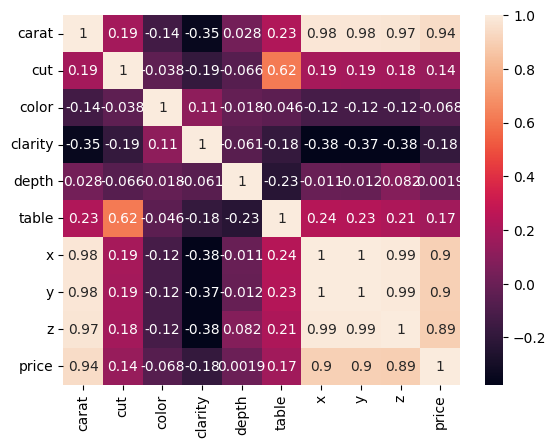

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df



,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,4,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,2,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,7,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,7,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,5,7,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,1,4,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,5,7,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,4,4,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,4,4,3,62.9,55.0,4.45,4.49,2.81,681
